## Hierarchical clustering of Pandas DataFrame rows

http://datanongrata.com/2019/04/27/67/

In [57]:
from collections import defaultdict
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import rgb2hex, colorConverter
from scipy.cluster.hierarchy import set_link_color_palette
import pandas as pd
import scipy.cluster.hierarchy as sch
from pylab import rcParams, get_cmap

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv(
    'data/AirDataEPA/StateCountySiteAvg_HourCrosstab.csv', 
    sep='\t', 
    encoding='utf-16le',
    usecols=['Hour of DateTime Local','StateCountySite','Avg. Measure-DailyMin Norm']
).rename(columns={'Hour of DateTime Local':'hour',
           'StateCountySite':'site',
           'Avg. Measure-DailyMin Norm':'measure'})
df.head()

,hour,site,measure
0,23,Alabama_Jefferson_0023,0.398432
1,22,Alabama_Jefferson_0023,0.453380
2,21,Alabama_Jefferson_0023,0.471132
3,20,Alabama_Jefferson_0023,0.492388
4,19,Alabama_Jefferson_0023,0.495060


In [3]:
df[df['measure'].isna()]

,hour,site,measure
5541,1,Pennsylvania_Adams_0001,NaN


In [4]:
tb = df.pivot_table(index='site',columns='hour',values='measure')
tb

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
site,,,,,,,,,,,,,,,,,,,,,
Alabama_Jefferson_0023,0.389137,0.341896,0.320060,0.301924,0.367327,0.466502,0.544784,0.422935,0.331889,0.286723,...,0.192889,0.228693,0.274570,0.374380,0.463634,0.495060,0.492388,0.471132,0.453380,0.398432
Alabama_Jefferson_1003,0.382186,0.362507,0.323148,0.315335,0.330997,0.405615,0.454839,0.376973,0.262347,0.176057,...,0.135569,0.175368,0.220912,0.327551,0.397475,0.460752,0.459180,0.457330,0.426168,0.400718
Alabama_Jefferson_2059,NaN,0.266544,0.266492,0.279447,0.355171,0.451669,0.476029,0.408194,0.311588,0.244664,...,0.227899,0.264744,0.329074,0.433281,0.509416,0.513081,0.505138,0.489262,0.456187,0.408199
Alaska_Anchorage _0018,0.291674,0.243896,0.206575,0.175609,0.187201,0.231404,0.356919,0.502183,0.463665,0.402951,...,0.205805,0.190178,0.226321,0.275666,0.328128,0.387203,0.392141,0.396303,0.394393,0.341512
Alaska_Fairbanks North Star _0034,0.306515,0.248669,0.212429,0.186153,0.216735,0.267359,0.388758,0.440953,0.413623,0.377290,...,0.285503,0.284862,0.372227,0.362391,0.372944,0.398339,0.420353,0.433836,0.410928,0.365643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wisconsin_Dodge_0001,0.552177,0.547755,0.542843,0.372093,0.187352,0.495957,0.521903,0.543187,0.511342,0.463757,...,0.406541,0.419566,0.439806,0.475558,0.500519,0.549062,0.554113,0.540444,0.532221,0.554693
Wisconsin_Milwaukee_0056,0.206793,0.168667,0.122729,0.169536,0.296454,0.489963,0.604605,0.517529,0.388786,0.305323,...,0.437536,0.509792,0.481929,0.433318,0.421236,0.427427,0.408460,0.397605,0.346845,0.280373
Wyoming_Converse_0010,0.327388,0.714542,0.375891,0.743755,0.437564,0.387308,0.385064,0.416071,0.435242,0.462641,...,0.491015,0.497428,0.479323,0.456262,0.377008,0.352992,0.338591,0.344485,0.328652,0.329391


In [5]:
tb.to_numpy()

array([[0.3891367 , 0.34189553, 0.32005993, ..., 0.47113162, 0.45338048,
        0.39843231],
       [0.38218554, 0.36250685, 0.3231479 , ..., 0.45732965, 0.42616808,
        0.40071783],
       [       nan, 0.2665437 , 0.26649174, ..., 0.48926158, 0.45618687,
        0.40819915],
       ...,
       [0.32738773, 0.71454244, 0.37589084, ..., 0.34448472, 0.3286524 ,
        0.32939117],
       [0.37683847, 0.17661436, 0.26947452, ..., 0.48418737, 0.4273542 ,
        0.29117132],
       [0.26103073,        nan, 0.43546752, ..., 0.48205789, 0.45182194,
        0.43228241]])

### Fill in NaN

The hierarchical clustering algorithm can't handle NaNs, so we need to fill in with something. This would probably be better with interpolated values, I'll just do a whole sample median for now...

In [6]:
tb = tb.fillna(df['measure'].median())

In [16]:
c_dist = pdist(tb) # computing the distance
c_link = linkage(tb,  metric='euclidean', method='ward') # computing the linkage

In [64]:
rcParams['figure.figsize'] = 20,10

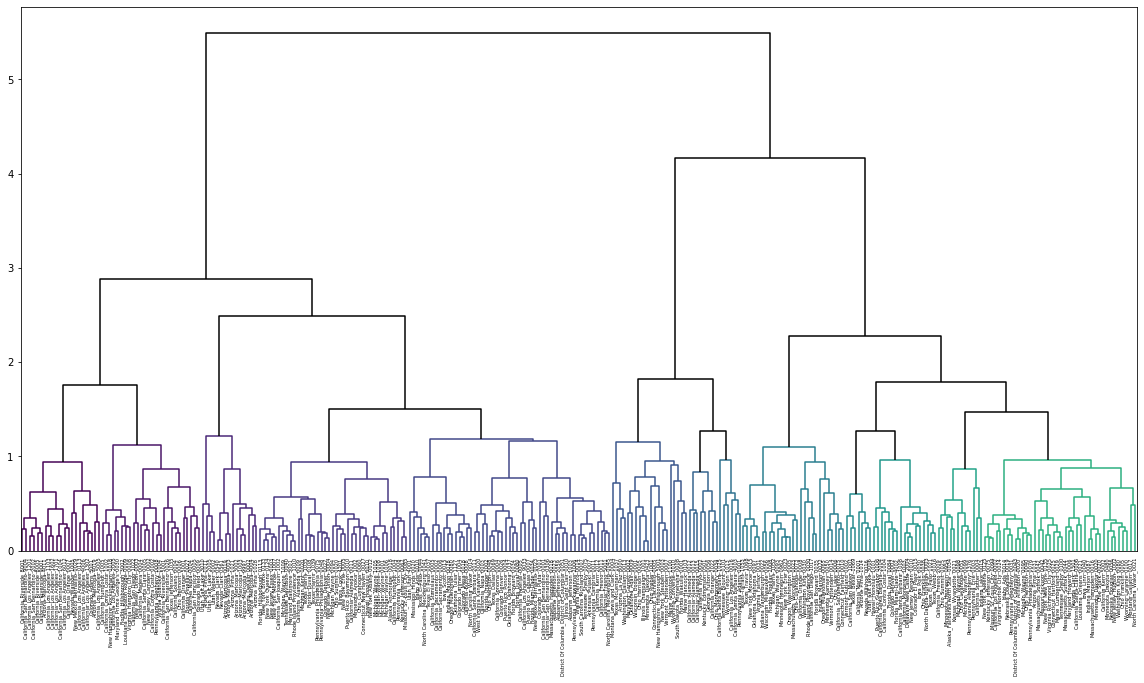

In [65]:
cmap = get_cmap('viridis',lut=20)
set_link_color_palette([rgb2hex(cc) for cc in cmap.colors])
# B = dendrogram(c_link,labels=list(tb.index),color_threshold=1.25,no_plot=True,above_threshold_color='#000000')

B = dendrogram(c_link,labels=list(tb.index),color_threshold=1.25,above_threshold_color='#000000')
pyplot.savefig('data/AirDataEPA/site_hours_avg_clustering.pdf', bbox_inches='tight')

In [51]:
B.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])

In [66]:
ivl = B['ivl']
leaves = B['leaves']
colors = B['color_list']
# for some reason colors is one less than the rest...
colors.append('#123456')

In [67]:
len(ivl)

291

In [68]:
len(colors)

291

In [69]:
list(zip(ivl,leaves,colors))[:]

[('California_Riverside_8001', 61, '#440154'),
 ('California_San Bernardino_9004', 72, '#440154'),
 ('California_Los Angeles_1201', 42, '#440154'),
 ('California_San Bernardino_2002', 71, '#440154'),
 ('California_Riverside_8005', 62, '#440154'),
 ('California_Riverside_9001', 63, '#440154'),
 ('Arizona_Maricopa_4011', 11, '#440154'),
 ('California_Los Angeles_1103', 41, '#440154'),
 ('California_Los Angeles_1602', 44, '#440154'),
 ('California_Los Angeles_1701', 45, '#440154'),
 ('California_San Bernardino_1004', 70, '#440154'),
 ('California_Los Angeles_6012', 49, '#440154'),
 ('California_Orange_0007', 56, '#440154'),
 ('Nevada_Washoe_1005', 183, '#440154'),
 ('New Mexico_Bernalillo_0029', 193, '#440154'),
 ('California_Los Angeles_0113', 40, '#440154'),
 ('California_Los Angeles_4006', 47, '#440154'),
 ('California_Los Angeles_1302', 43, '#440154'),
 ('Colorado_Adams_3001', 89, '#440154'),
 ('Arizona_Maricopa_4019', 12, '#440154'),
 ('California_Los Angeles_5005', 48, '#481467'),
 

In [70]:
sites_ordered = pd.DataFrame({'site':ivl,'original_order':leaves,'cluster_id':colors})
sites_ordered.reset_index(inplace=True)
sites_ordered.rename(columns={'index':'clustered_order'}, inplace=True)
# sites_ordered['original_order'] = leaves
sites_ordered.head()

,clustered_order,site,original_order,cluster_id
0,0,California_Riverside_8001,61,#440154
1,1,California_San Bernardino_9004,72,#440154
2,2,California_Los Angeles_1201,42,#440154
3,3,California_San Bernardino_2002,71,#440154
4,4,California_Riverside_8005,62,#440154


In [71]:
sites_ordered.to_csv('data/AirDataEPA/sites_clustered.txt',sep='\t',encoding='utf-16le',index=False)